<a href="https://colab.research.google.com/github/gowtham-dd/Data-Science-Basics/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [4]:
classifer=DecisionTreeClassifier()
classifer.fit(iris.data,iris.target)

DecisionTreeClassifier()

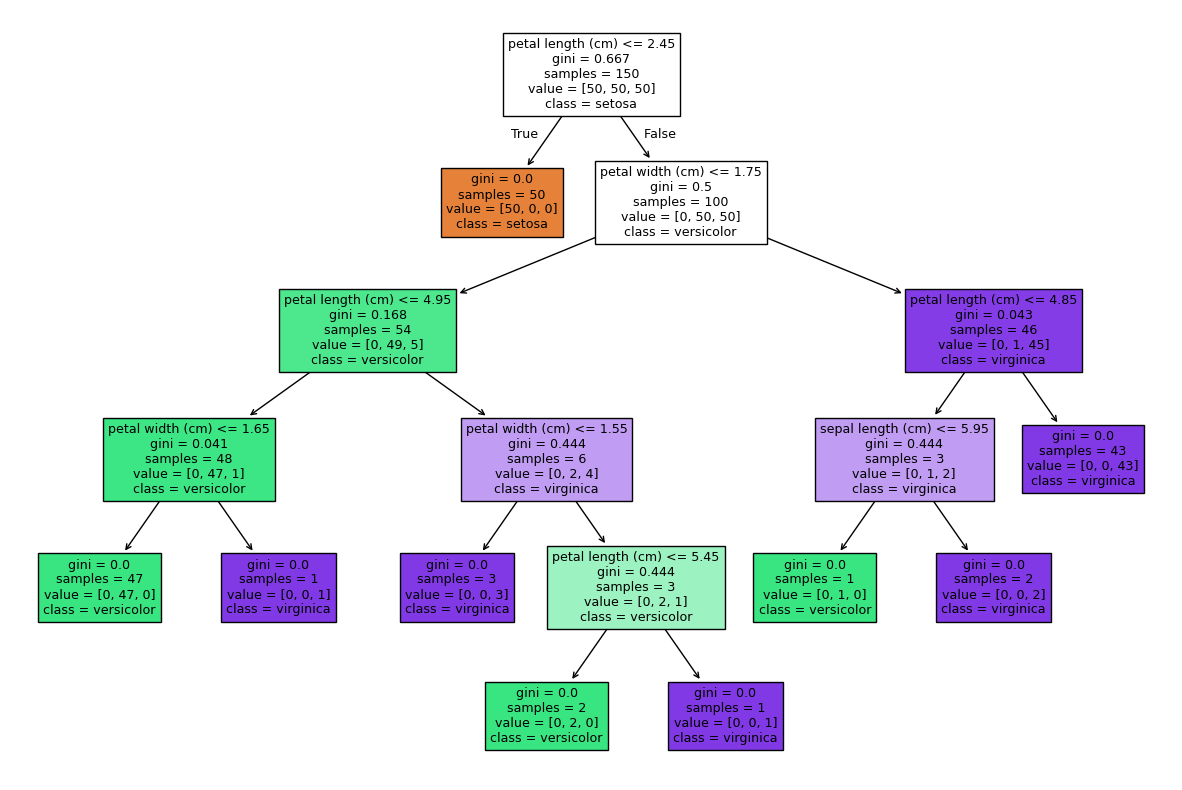

In [6]:
plt.figure(figsize=(15,10))
tree.plot_tree(classifer,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
plt.show()

## Breast Cancer

In [8]:
dataset=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,test_size=0.3,random_state=42)

In [12]:
cls=DecisionTreeClassifier(max_depth=4)
cls.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [13]:
cls.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,cls.predict(X_test))

0.9532163742690059

In [15]:
from sklearn.metrics import recall_score
recall_score(y_test,cls.predict(X_test))

0.9629629629629629

In [16]:
from sklearn.metrics import precision_score
precision_score(y_test,cls.predict(X_test))

0.9629629629629629

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,cls.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [19]:
## Criterion is used to define entropy and guni
cls.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

## Feature importance

In [22]:
feature_names=dataset.columns
feature_names

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [23]:
cls.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.75979729, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01385726, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04039584, 0.12024369, 0.        , 0.03744905, 0.01071998,
       0.        , 0.        , 0.        , 0.        , 0.01753688])

In [24]:
feature_importance=pd.DataFrame(data=cls.feature_importances_,index=feature_names,columns=['importance'])
feature_importance.sort_values(by='importance',ascending=False)

,importance
mean concave points,0.759797
worst texture,0.120244
worst radius,0.040396
worst area,0.037449
worst fractal dimension,0.017537
area error,0.013857
worst smoothness,0.010720
mean compactness,0.000000
mean symmetry,0.000000
mean smoothness,0.000000


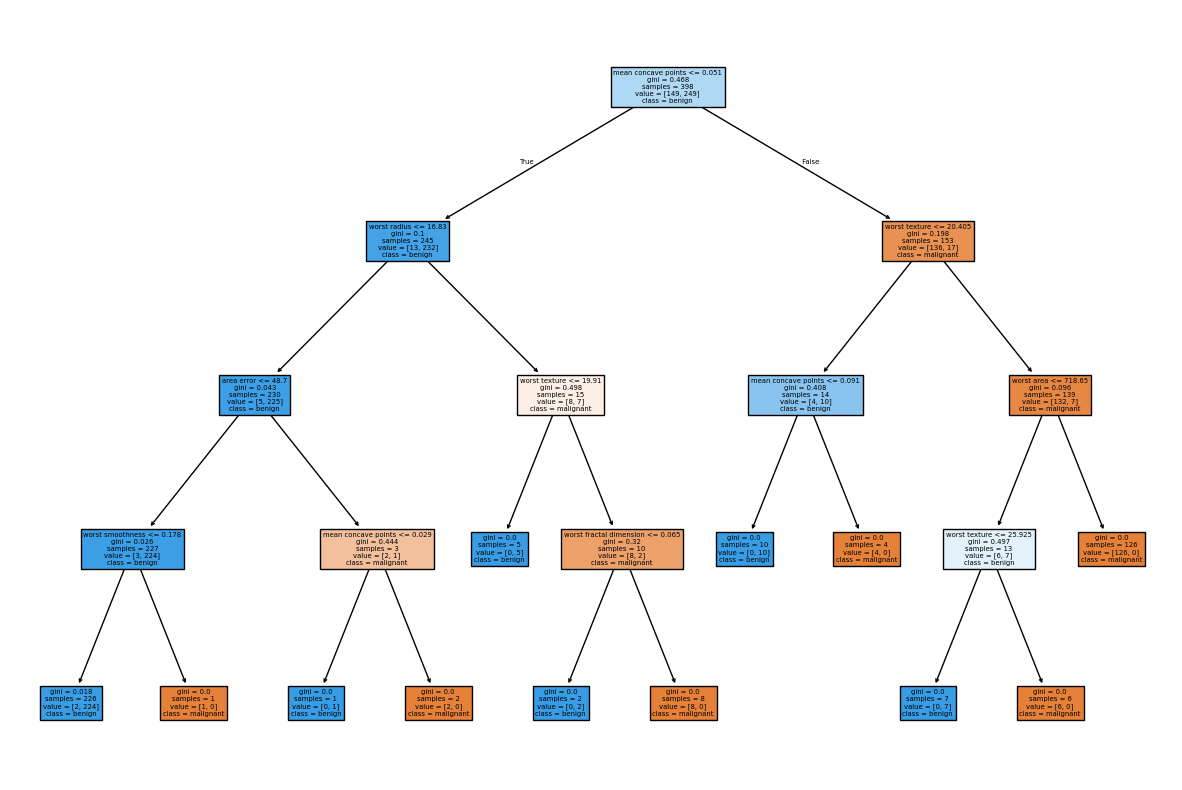

In [28]:
plt.figure(figsize=(15,10))
tree.plot_tree(cls,feature_names=cancer.feature_names,class_names=cancer.target_names,filled=True)
plt.show()

In [ ]:
# pruning
